In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from control.matlab import * 
from scipy import signal
from scipy import linalg 

In [2]:
# Define the system
A = np.array([[-0.75,1],[-0.3,-0.75]])
B = np.array([2,1]).reshape((2,1))
C = np.array([1,2])
D = 0 

# Build the system
sys = ss(A,B,C,D)

In [3]:
# I cannot load the slycot package so I create the controllability and obserbability gramians function
def compute_gramians(sys,Letter):
    A = sys.A 
    if Letter=='c':
        # Compute controllability Gramian
        B = sys.B
        W = linalg.solve_continuous_lyapunov(A, -B @ B.T)
    elif Letter=='o':
        # Compute observability Gramian
        C = sys.C 
        W = linalg.solve_continuous_lyapunov(A.T, -C.T @ C)
    else:
        print("Please, Insert a correct option, 'c' or 'o' ")
    
    return W

# Compute the Gramians 
Wc = compute_gramians(sys,'c')
Wo = compute_gramians(sys,'o')

In [ ]:
# Let us find the T matrix for balancing transformation 
_,T_u = np.linalg.eig(Wc@Wo)


Sig_c = np.linalg.inv(T_u) @ Wc @ np.linalg.inv(T_u).T
Sig_o = T_u.T @ Wo @ T_u
Sig_b = linalg.fractional_matrix_power(Sig_c,1/4) @ linalg.fractional_matrix_power(Sig_o,-1/4)
#Sig_b= Sig_u**(1/4)
T_b = T_u@Sig_b



array([[ 1.28659577, -1.28659577],
       [ 0.38862245,  0.38862245]])

In [7]:
# New Balanced Model 
A_b = np.linalg.inv(T_b)@A@T_b
B_b = np.linalg.inv(T_b)@B 
C_b = C@T_b 
D_b = D 

sys_b = ss(A_b,B_b,C_b,D_b) 

# Compute the balanced Gramians 
Wc_b = compute_gramians(sys_b,'c')
Wo_b = compute_gramians(sys_b,'o')

In [18]:
np.linalg.inv(T_b) @ np.sqrt(Wc_b) @ T_b

array([[ 0.98029782, -0.4139529 ],
       [-0.41395286,  0.98029778]])

In [19]:
np.abs(np.linalg.inv(T_b) @ np.sqrt(Wc_b) @ T_b)

array([[0.98029782, 0.4139529 ],
       [0.41395286, 0.98029778]])

In [20]:
## Plot Gramians
theta = np.arange(0,2*np.pi,0.01)
xc = np.cos(theta)
yc = np.sin(theta)
CIRC = np.row_stack((xc,yc))


ELLIPb = np.abs(np.linalg.inv(T_b) @ np.sqrt(Wc_b) @ T_b) @ CIRC
ELLIPc = np.sqrt(Wc) @ CIRC
ELLIPo = np.sqrt(Wo) @ CIRC

C:\Users\ccandelo\AppData\Local\Temp\ipykernel_22264\3660179484.py:5: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  CIRC = np.row_stack((xc,yc))


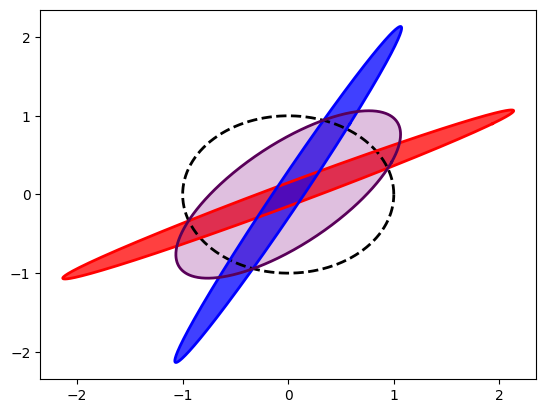

In [21]:
plt.plot(xc,yc,'k--',linewidth=2)

# Draw controllability Gramian (unbalanced)
plt.plot(ELLIPc[0,:],ELLIPc[1,:],'r',linewidth=2)
plt.fill(ELLIPc[0,:],ELLIPc[1,:],'r',alpha=0.75)

# Draw observability Gramian (unbalanced)
plt.plot(ELLIPo[0,:],ELLIPo[1,:],'b',linewidth=2)
plt.fill(ELLIPo[0,:],ELLIPo[1,:],'b',alpha=0.75)

# Draw balanced Gramians
plt.plot(ELLIPb[0,:],ELLIPb[1,:],color=(0.35,0,0.35),linewidth=2)
plt.fill(ELLIPb[0,:],ELLIPb[1,:],color=(0.5,0,0.5),alpha=0.25)

plt.show()